In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import array
from scipy.stats import mode
from scipy.interpolate import interp1d

import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import SimpleRNN
from keras.layers import Conv1D, MaxPooling1D, Dense, Input, Dropout, Flatten, BatchNormalization
from keras.layers import concatenate, Dropout
from keras.utils import to_categorical
from keras import optimizers
import seaborn as sns

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.shape

(1462, 5)

In [5]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [6]:
dfx = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['meantemp']]
dfx = dfx[['humidity', 'wind_speed', 'meanpressure']]

dfx

,humidity,wind_speed,meanpressure
0,0.820957,0.000000,0.132603
1,0.907591,0.070583,0.132881
2,0.849835,0.109743,0.132994
3,0.668867,0.029212,0.132799
4,0.847910,0.087636,0.132712
...,...,...,...
1457,0.630865,0.084032,0.132590
1458,0.859736,0.142113,0.132764
1459,0.880638,0.148429,0.132895
1460,0.849835,0.173496,0.132660


In [7]:
dfx.describe()

,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000
mean,0.546868,0.161113,0.132009
std,0.193709,0.108044,0.023460
min,0.000000,0.000000,0.000000
25%,0.426774,0.082307,0.130770
50%,0.568276,0.147363,0.131679
75%,0.679094,0.218812,0.132509
max,1.000000,1.000000,1.000000


In [8]:
dfy.head()

,meantemp
0,0.122271
1,0.042795
2,0.035662
3,0.081514
4,0.000000


In [9]:
time_step = 40
step = 10

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [10]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(143, 40, 3)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95, 40, 3), (48, 40, 3), (95, 1), (48, 1))

In [12]:

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', padding='same', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [13]:
from keras.optimizers import Adam

model.compile(loss='mse', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [14]:
# fit network
train_epochs = 300
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=64, verbose=True,  validation_split=0.2, shuffle=True)

Epoch 1/300
2/2 [==============================] - 5s 739ms/step - loss: 0.0572 - accuracy: 0.0000e+00 - val_loss: 0.0639 - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 [==============================] - 0s 92ms/step - loss: 0.0541 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 74ms/step - loss: 0.0552 - accuracy: 0.0000e+00 - val_loss: 0.0474 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 [==============================] - 0s 90ms/step - loss: 0.0529 - accuracy: 0.0000e+00 - val_loss: 0.0435 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 [==============================] - 0s 90ms/step - loss: 0.0501 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 [==============================] - 0s 89ms/step - loss: 0.0488 - accuracy: 0.0000e+00 - val_loss: 0.0380 - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 [==============================] - 0s 92ms/step - loss: 0.0398 - accuracy: 0.0000e+00 - val_los

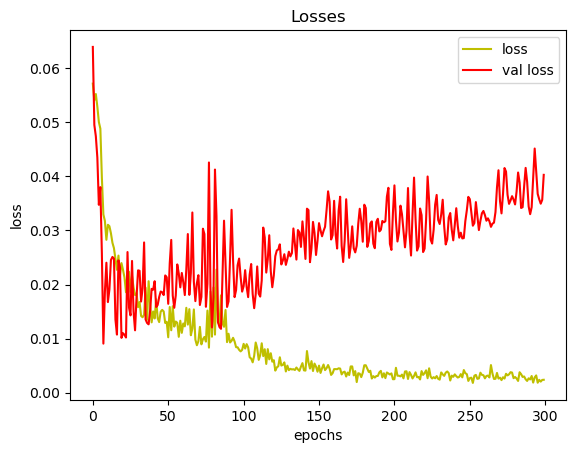

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [16]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


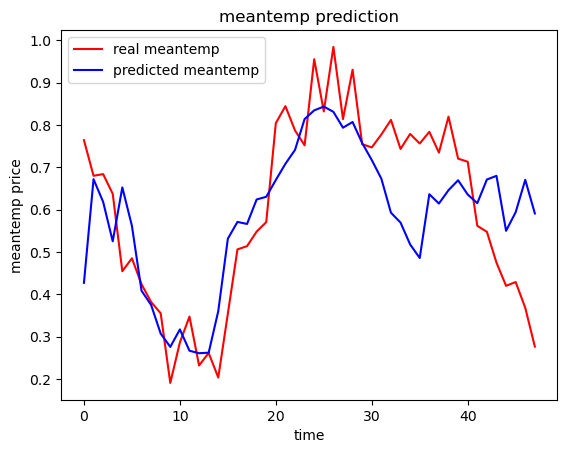

In [17]:
y_pred.shape

plt.plot(y_test, color='red', label='real meantemp')
plt.plot(y_pred, color='blue', label='predicted meantemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp price')
plt.legend()
plt.show()